以后代码尽量与笔记的章节对应，方便查找

### 3.1.2 评估方法-划分为train-test存在数据分布不一致的问题

In [6]:
import math

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score
import numpy as np

# 加载 Titanic 数据集
df = pd.read_csv("../input/titanic.csv")

# 数据预处理
# 选择数值和类别特征
numerical_features = ['Age', 'Fare']  # 数值特征
categorical_features = ['Sex', 'Pclass']  # 类别特征

# 构造预处理步骤
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),  # 填补缺失值
    ('scaler', StandardScaler())  # 标准化
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),  # 填补缺失值
    ('onehot', OneHotEncoder(handle_unknown='ignore'))  # 独热编码
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)

# 定义目标变量和特征
X = df[['Age', 'Fare', 'Sex', 'Pclass']]
y = df['Survived']  # 生存与否是目标变量

# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

# 创建模型流水线
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

# 在训练集上训练模型
model.fit(X_train, y_train)

# 获取训练集上的回归系数
coefs_train = model.named_steps['regressor'].coef_

# 预测训练集的目标值并计算准确率
y_train_pred = model.predict(X_train)
train_r2 = r2_score(y_train, y_train_pred)

# 在测试集上训练模型
model.fit(X_test, y_test)

# 获取测试集上的回归系数
coefs_test = model.named_steps['regressor'].coef_

# 预测测试集的目标值并计算准确率
y_test_pred = model.predict(X_test)
test_r2 = r2_score(y_test, y_test_pred)

# 打印训练集和测试集的回归系数
print("训练集上的回归系数:")
print(coefs_train)

print("\n测试集上的回归系数:")
print(coefs_test)

# 打印训练集和测试集的准确率
print("\n训练集上的 R² 准确率: {:.4f}".format(train_r2))
print("测试集上的 R² 准确率: {:.4f}".format(test_r2))


训练集上的回归系数:
[-0.04761385  0.01932153  0.25603174 -0.25603174  0.11621646  0.05061214
 -0.1668286 ]

测试集上的回归系数:
[-0.09023746 -0.0226823   0.24574646 -0.24574646  0.27427401 -0.06382405
 -0.21044996]

训练集上的 R² 准确率: 0.3848
测试集上的 R² 准确率: 0.3975


### 3.1.3 模型评估-分类-ROC曲线和PR曲线

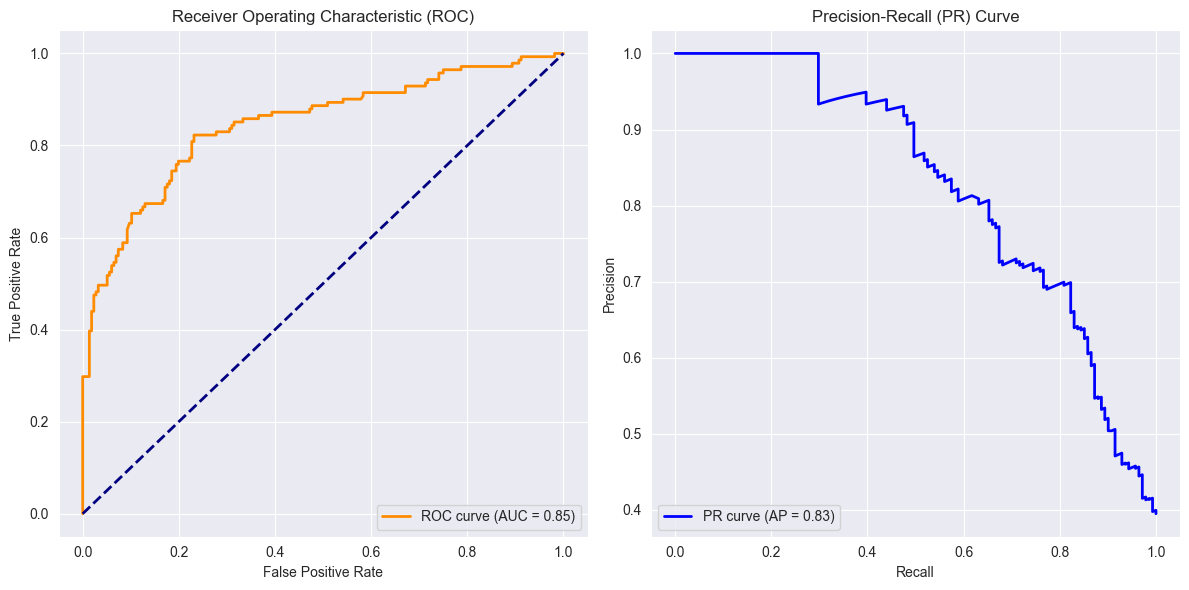

In [8]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import roc_curve, auc, precision_recall_curve, average_precision_score
import matplotlib.pyplot as plt

# 加载 Titanic 数据集
df = pd.read_csv("../input/titanic.csv")

# 数据预处理
numerical_features = ['Age', 'Fare']  # 数值特征
categorical_features = ['Sex', 'Pclass']  # 类别特征

numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)

# 定义目标变量和特征
X = df[['Age', 'Fare', 'Sex', 'Pclass']]
y = df['Survived']

# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

# 创建分类模型流水线
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression())
])

# 在训练集上训练模型
model.fit(X_train, y_train)

# 获取测试集上的预测概率
y_score = model.predict_proba(X_test)[:, 1]  # 获取正类的预测概率

# 计算 ROC 曲线和 AUC
fpr, tpr, roc_thresholds = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)

# 计算 Precision-Recall 曲线和 Average Precision
precision, recall, pr_thresholds = precision_recall_curve(y_test, y_score)
avg_precision = average_precision_score(y_test, y_score)

# 绘制 ROC 曲线
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f"ROC curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # 对角线
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")

# 绘制 Precision-Recall 曲线
plt.subplot(1, 2, 2)
plt.plot(recall, precision, color='blue', lw=2, label=f"PR curve (AP = {avg_precision:.2f})")
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall (PR) Curve')
plt.legend(loc="lower left")

plt.tight_layout()
plt.show()


### 3.1.3 模型评估-分类-评估指标

In [9]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc, precision_recall_curve, average_precision_score

# 在测试集上进行预测
y_pred = model.predict(X_test)

# 1. 混淆矩阵
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

# 提取混淆矩阵的值
TP = cm[1, 1]  # 真阳性
TN = cm[0, 0]  # 真阴性
FP = cm[0, 1]  # 假阳性
FN = cm[1, 0]  # 假阴性
print(f"\n真阳性 (TP): {TP}, 真阴性 (TN): {TN}, 假阳性 (FP): {FP}, 假阴性 (FN): {FN}")

# 2. 准确率 (Accuracy)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# 3. 错误率 (Error Rate)
error_rate = 1 - accuracy
print(f"Error Rate: {error_rate:.4f}")

# 4. 查准率 (Precision)
precision = precision_score(y_test, y_pred)
print(f"Precision: {precision:.4f}")

# 5. 查全率 (Recall)
recall = recall_score(y_test, y_pred)
print(f"Recall: {recall:.4f}")

# 6. F1值 (F1 Score)
f1 = f1_score(y_test, y_pred)
print(f"F1 Score: {f1:.4f}")





Confusion Matrix:
[[186  30]
 [ 46  95]]

真阳性 (TP): 95, 真阴性 (TN): 186, 假阳性 (FP): 30, 假阴性 (FN): 46
Accuracy: 0.7871
Error Rate: 0.2129
Precision: 0.7600
Recall: 0.6738
F1 Score: 0.7143


### 3.1.3 模型评估-分类

In [10]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt

# 加载 Titanic 数据集
df = pd.read_csv("../input/titanic.csv")

# 数据预处理
numerical_features = ['Age', 'Fare']  # 数值特征
categorical_features = ['Sex', 'Pclass']  # 类别特征

numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)

# 定义目标变量和特征
X = df[['Age', 'Fare', 'Sex', 'Pclass']]
y = df['Survived']

# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

# 创建分类模型流水线
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LinearRegression())
])


# 训练模型
model.fit(X_train, y_train)

# 预测
y_pred = model.predict(X_test)

# 定义阈值
delta = 1  # for Huber and Smooth L1

# 计算指标
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
nrmse = rmse / (y_test.max() - y_test.min())
msle = mean_squared_error(np.log1p(y_test), np.log1p(np.clip(y_pred, 0, None)))  # 避免负值取对数错误
rmsle = np.sqrt(msle)
r2 = r2_score(y_test, y_pred)
adjusted_r2 = 1 - (1 - r2) * ((len(y_test) - 1) / (len(y_test) - X_test.shape[1] - 1))

# Huber loss
huber = np.mean([
    0.5 * (y - y_hat)**2 if abs(y - y_hat) <= delta else delta * abs(y - y_hat) - 0.5 * delta**2
    for y, y_hat in zip(y_test, y_pred)
])

# Smooth L1 loss
smooth_l1 = np.mean([
    0.5 * (y - y_hat)**2 if abs(y - y_hat) <= delta else abs(y - y_hat) - 0.5
    for y, y_hat in zip(y_test, y_pred)
])

# 打印结果
print(f"MAE (Mean Absolute Error): {mae:.4f}")
print(f"MSE (Mean Squared Error): {mse:.4f}")
print(f"RMSE (Root Mean Squared Error): {rmse:.4f}")
print(f"NRMSE (Normalized RMSE): {nrmse:.4f}")
print(f"MSLE (Mean Squared Logarithmic Error): {msle:.4f}")
print(f"RMSLE (Root Mean Squared Logarithmic Error): {rmsle:.4f}")
print(f"R² (Coefficient of Determination): {r2:.4f}")
print(f"Adjusted R² (Adjusted Coefficient of Determination): {adjusted_r2:.4f}")
print(f"Huber Loss: {huber:.4f}")
print(f"Smooth L1 Loss: {smooth_l1:.4f}")


MAE (Mean Absolute Error): 0.3005
MSE (Mean Squared Error): 0.1509
RMSE (Root Mean Squared Error): 0.3884
NRMSE (Normalized RMSE): 0.3884
MSLE (Mean Squared Logarithmic Error): 0.0744
RMSLE (Root Mean Squared Logarithmic Error): 0.2728
R² (Coefficient of Determination): 0.3687
Adjusted R² (Adjusted Coefficient of Determination): 0.3615
Huber Loss: 0.0754
Smooth L1 Loss: 0.0754


In [11]:
import numpy as np

# 获取预测值（在上一个单元格中已经计算）
y_pred = model.predict(X_test)

# 计算残差
residuals = y_test - y_pred

# 样本数量
n = len(y_test)

# 模型参数个数 (回归系数 + 截距)
k = model.named_steps['classifier'].coef_.shape[0] + 1

# 估计残差的均方差（sigma^2）
sigma_squared = np.mean(residuals**2)

# 对数似然函数值
log_likelihood = -0.5 * n * (np.log(2 * np.pi * sigma_squared) + 1)

# 计算 AIC 和 BIC
aic = -2 * log_likelihood + 2 * k
bic = -2 * log_likelihood + k * np.log(n)

print(f"log likelihood: {log_likelihood}")
print(f"k: {k}")
print(f"n: {n}")
print(f"AIC: {aic}")
print(f"BIC: {bic}")


log likelihood: -168.94461796405596
k: 8
n: 357
AIC: 353.88923592811193
BIC: 384.91112218234906


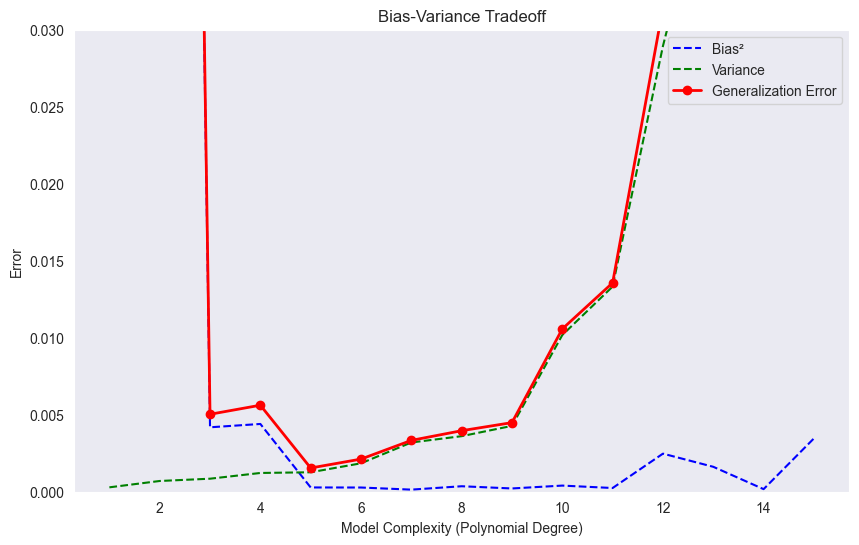

In [12]:
import math
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# 设置随机种子以确保可重复性
np.random.seed(42)

# 生成数据
def true_function(x):
    return np.sin(2 * np.pi * x) + 2 * x + np.sqrt(x)

n_samples = 50
x = np.sort(np.random.rand(n_samples))
y = true_function(x) + np.random.normal(scale=0.1, size=n_samples)

# 设置模型复杂度范围
complexity_range = range(1, 16)

# 保存结果
bias_squared = []
variance = []
error = []

# 多次实验的保存
individual_predictions = []
mean_predictions = []

x_test = np.linspace(0, 1, 100).reshape(-1, 1)
true_y_test = true_function(x_test)

# 循环遍历不同模型复杂度
for degree in complexity_range:
    poly = PolynomialFeatures(degree=degree)
    X_train_poly = poly.fit_transform(x.reshape(-1, 1))
    X_test_poly = poly.transform(x_test)
    
    predictions = []
    
    for _ in range(20):  # 多次实验
        # 生成带噪声的数据
        y_noisy = true_function(x) + np.random.normal(scale=0.1, size=n_samples)
        
        # 拟合模型
        model = LinearRegression()
        model.fit(X_train_poly, y_noisy)
        predictions.append(model.predict(X_test_poly))
    
    predictions = np.array(predictions)
    mean_prediction = predictions.mean(axis=0)
    
    # 计算bias^2, variance和error
    bias_squared.append(np.mean((mean_prediction - true_y_test.ravel())**2))
    variance.append(np.mean(np.var(predictions, axis=0)))
    error.append(np.mean((predictions - true_y_test.ravel())**2))
    
    individual_predictions.append(predictions)
    mean_predictions.append(mean_prediction)

# 绘制曲线
plt.figure(figsize=(10, 6))
plt.plot(complexity_range, bias_squared, label="Bias²", color="blue", linestyle="--")
plt.plot(complexity_range, variance, label="Variance", color="green", linestyle="--")
plt.plot(complexity_range, error, label="Generalization Error", marker="o", color="red", linestyle="-", linewidth=2)
plt.xlabel("Model Complexity (Polynomial Degree)")
plt.ylabel("Error")
plt.ylim(0, 0.03)
plt.title("Bias-Variance Tradeoff")
plt.legend()
plt.grid()

# 绘制偏差和方差的变化趋势
plt.show()

# # 绘制每个模型复杂度下的个体预测和均值预测
# for i, degree in enumerate(complexity_range[:5]):  # 只展示前5个复杂度
#     plt.figure(figsize=(8, 4))
#     plt.plot(x_test, true_function(x_test), "r-", label="True Function")
#     plt.scatter(x, y, color="b", label="Noisy Data", alpha=0.5)
#     
#     for pred in individual_predictions[i]:
#         plt.plot(x_test, pred, color="orange", alpha=0.1)
#     
#     plt.plot(x_test, mean_predictions[i], "g-", label="Mean Prediction")
#     plt.title(f"Degree {degree}")
#     plt.legend()
#     plt.grid()
#     plt.show()
